In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
streaming1 = pd.read_json('StreamingHistory0.json')
streaming2 = pd.read_json('StreamingHistory1.json')
streaming3 = pd.read_json('StreamingHistory2.json')
streaming_history = [streaming1, streaming2, streaming3]
data = pd.concat(streaming_history)
data['endTime'] = pd.to_datetime(data['endTime'])

In [30]:
data.shape

(20424, 5)

In [24]:
data.head()

,endTime,artistName,trackName,msPlayed
0,2020-02-27 11:10:00,Eminem,Venom - Music From The Motion Picture,1114
1,2020-02-27 11:10:00,Journey,Any Way You Want It - Live at Cobo Hall in Det...,5828
2,2020-02-27 11:10:00,Eminem,'Till I Collapse,3924
3,2020-02-27 11:10:00,Smokie,Who the Fuck Is Alice - Live,21501
4,2020-02-27 11:13:00,Eminem,'Till I Collapse,173731


In [25]:
data['hoursPlayed'] = data['msPlayed'] / (1000 * 60 * 60) 

In [26]:
weekly = data.groupby(pd.Grouper(key='endTime', freq='W')).sum()
monthly = data.groupby(pd.Grouper(key='endTime', freq='M')).sum()

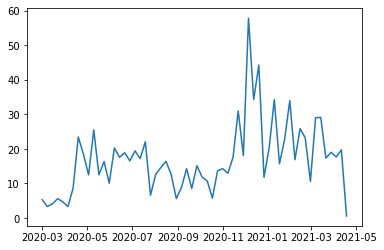

In [28]:
plt.plot(weekly['hoursPlayed'])

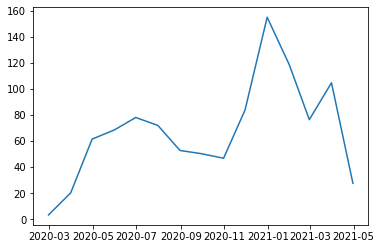

In [29]:
plt.plot(monthly['hoursPlayed'])

In [31]:
weekly['hoursPlayed'].sum()

1020.2147341666666

In [32]:
data['artistName'].nunique()

2260

In [33]:
data['artistName'].value_counts()

Frédéric Chopin      2425
Halsey               1051
Machine Gun Kelly     740
Point North           554
DREAMERS              478
                     ... 
Haggard                 1
Yao Chen                1
Dark Sky                1
Mountain                1
Kaiyko                  1
Name: artistName, Length: 2260, dtype: int64

In [34]:
data['trackName'].value_counts()

bloody valentine                                             110
I Think I'm OKAY (with YUNGBLUD & Travis Barker)             109
3am                                                          108
Monsters (feat. blackbear)                                   104
Candy (feat. Trippie Redd)                                   103
                                                            ... 
Kebnekajse                                                     1
This Precious Time                                             1
TORTURE                                                        1
2 Arabesques in G Major, L. 66: II. Allegretto scherzando      1
Shy Paws                                                       1
Name: trackName, Length: 6599, dtype: int64

In [ ]:
value_counts